## Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

   1. Подготовить данные;
   2. Провести исследовательский анализ данных;
   3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.


## 1. Подготовьте данные

In [1]:
#основные библиотеки
import pandas as pd
import numpy as np

#визуализация
import seaborn as sns
import matplotlib.pyplot as plt

#модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#инструменты и метрики
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import collections 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#откроем файлы

data_train = pd.read_csv('desktop/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('desktop/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('desktop/datasets/gold_recovery_full_new.csv')

In [3]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
pd.DataFrame(round((data_full.isna().mean()*100),2)).style.background_gradient('ocean') 

,0
date,0.000000
final.output.concentrate_ag,0.010000
final.output.concentrate_pb,0.010000
final.output.concentrate_sol,1.090000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.010000
final.output.tail_pb,0.520000
final.output.tail_sol,0.030000
final.output.tail_au,0.000000


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
pd.DataFrame(round((data_test.isna().mean()*100),2)).style.background_gradient('ocean') 

,0
date,0.000000
primary_cleaner.input.sulfate,0.080000
primary_cleaner.input.depressant,0.090000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.080000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [9]:
pd.DataFrame(round((data_train.isna().mean()*100),2)).style.background_gradient('ocean') 

,0
date,0.000000
final.output.concentrate_ag,0.010000
final.output.concentrate_pb,0.010000
final.output.concentrate_sol,1.490000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,0.710000
final.output.tail_sol,0.040000
final.output.tail_au,0.000000


#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. 

Вычислите её на обучающей выборке для признака rougher.output.recovery.

Найдите MAE между вашими расчётами и значением признака. 

Опишите выводы

In [10]:
#выберем нужные данные и рассчитаем
input_au = data_train['rougher.input.feed_au']
output_au = data_train['rougher.output.concentrate_au']
output_tail = data_train['rougher.output.tail_au']

#recovery в выборке
recovery_real = data_train['rougher.output.recovery']

#recovery расчетный
recovery = (((output_au) * ((input_au) - (output_tail)))/(((input_au) * ((output_au) - (output_tail))))) * 100

#MAE
print('MAE =', mean_absolute_error(recovery_real, recovery))

MAE = 9.73512347450521e-15


<b>Вывод:</b> Значение recovery в тренировочной выборке рассчитано верно, так как MAE небольшое.

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [11]:
print(data_full.shape)
print(data_train.shape)
print(data_test.shape)

(19439, 87)
(14149, 87)
(5290, 53)


Очевидно, что в файле data_test не хватает столбцов. Сравним название столбцов и выясним каких именно не хватает.

In [12]:
#извлечем названия колонок в списки
list_columns_full=data_full.columns.to_list()
list_columns_test=data_test.columns.to_list()
#напечатаем все столбцы, которых нет в файле train
no_collumn_list=[item for item in list_columns_full if item not in list_columns_test]
no_collumn_list

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [13]:
#проверим что напечатались все
print(len(list_columns_full)-len(list_columns_test))
print(len(no_collumn_list))

34
34


In [14]:
#изучим подробнее какие столбцы были исключены
#превращаем в строку список с названиями столбцоы
no_collumn_list='.'.join(no_collumn_list)
#разбиваем по разделителю '.'
no_collumn_words=no_collumn_list.split('.')
#для удобства превращаем в Series
no_collumn_words=pd.Series(no_collumn_words)
#смотрим что получилось по "ключевым словам"
no_collumn_words.value_counts()

output                            30
rougher                           13
final                              9
primary_cleaner                    8
tail_pb                            4
calculation                        4
tail_au                            4
tail_sol                           4
tail_ag                            4
secondary_cleaner                  4
concentrate_au                     3
concentrate_sol                    3
concentrate_pb                     3
concentrate_ag                     3
recovery                           2
sulfate_to_au_concentrate          1
floatbank10_sulfate_to_au_feed     1
floatbank11_sulfate_to_au_feed     1
au_pb_ratio                        1
dtype: int64

In [15]:
no_collumn_words=no_collumn_list.split('.')
no_collumn_words=pd.Series(no_collumn_words)
no_collumn_words.value_counts()

output                            30
rougher                           13
final                              9
primary_cleaner                    8
tail_pb                            4
calculation                        4
tail_au                            4
tail_sol                           4
tail_ag                            4
secondary_cleaner                  4
concentrate_au                     3
concentrate_sol                    3
concentrate_pb                     3
concentrate_ag                     3
recovery                           2
sulfate_to_au_concentrate          1
floatbank10_sulfate_to_au_feed     1
floatbank11_sulfate_to_au_feed     1
au_pb_ratio                        1
dtype: int64

<b>Вывод по 1.3.:</b> Проведяанализ, заметим, что из 34 пропущенных столбцов 30 относятся к этапу output, 13 к rougher(флотации), 9 и 8 к этапам final и primary_cleaner.

#### 1.4. Проведите предобработку данных

In [16]:
#преобразуем столбец со временем в типа datetime
data_full['date']=pd.to_datetime(data_full['date'],format='%Y-%m-%d %H:%M:%S')
data_train['date']=pd.to_datetime(data_train['date'],format='%Y-%m-%d %H:%M:%S')
data_test['date']=pd.to_datetime(data_test['date'],format='%Y-%m-%d %H:%M:%S')

In [17]:
#пропусков немного, можно их заменить, не удаляя
#по исходным данным известно, что соседние по времени параметры часто похожи
#поэтому проведем сортировку по datetime + замену при помощи method {‘ffill‘} в fillna

In [18]:
#обработаем пропуски в данных файла train и проверим замены

data_train.sort_values(by='date',inplace=True)
data_train.fillna(method="ffill",inplace=True)
data_train.isna().sum().sum()

0

In [19]:
#обработаем пропуски в данных файла full и проверим замены
data_full.sort_values(by='date',inplace=True)
data_full.fillna(method="ffill",inplace=True)
data_full.isna().sum().sum()

0

In [20]:
#обработаем пропуски в данных файла test и проверим замены
data_test.sort_values(by='date',inplace=True)
data_test.fillna(method="ffill",inplace=True)
data_test.isna().sum().sum()

0

In [21]:
#удалим столбцы c date из train, test, full
data_train_nodate = data_train.drop(['date'], axis=1)
data_test_nodate = data_test.drop(['date'], axis=1)
data_full_nodate = data_full.drop(['date'], axis=1)

list_columns_full=data_full_nodate.columns.to_list()
list_columns_train=data_train_nodate.columns.to_list()
list_columns_test=data_test_nodate.columns.to_list()

In [22]:
#узнаем сколько у нас нулевых значений в файле full
#функция, принимающая на вход датасет и название колонки
def null_counts(data,column):
    print(column,'    ',data[data[column] == 0][column].count())
    
#обойдем все столбцы в датасете full
for item in list_columns_full:
    null_counts(data_full_nodate,item)

final.output.concentrate_ag      98
final.output.concentrate_pb      98
final.output.concentrate_sol      98
final.output.concentrate_au      98
final.output.recovery      98
final.output.tail_ag      91
final.output.tail_pb      91
final.output.tail_sol      91
final.output.tail_au      91
primary_cleaner.input.sulfate      0
primary_cleaner.input.depressant      18
primary_cleaner.input.feed_size      0
primary_cleaner.input.xanthate      0
primary_cleaner.output.concentrate_ag      108
primary_cleaner.output.concentrate_pb      114
primary_cleaner.output.concentrate_sol      116
primary_cleaner.output.concentrate_au      108
primary_cleaner.output.tail_ag      124
primary_cleaner.output.tail_pb      124
primary_cleaner.output.tail_sol      127
primary_cleaner.output.tail_au      124
primary_cleaner.state.floatbank8_a_air      0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air      0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner

In [23]:
#узнаем сколько у нас нулевых значений в файле train
for item in list_columns_full:
    null_counts(data_train_nodate,item)

final.output.concentrate_ag      58
final.output.concentrate_pb      58
final.output.concentrate_sol      58
final.output.concentrate_au      58
final.output.recovery      58
final.output.tail_ag      75
final.output.tail_pb      75
final.output.tail_sol      75
final.output.tail_au      75
primary_cleaner.input.sulfate      0
primary_cleaner.input.depressant      18
primary_cleaner.input.feed_size      0
primary_cleaner.input.xanthate      0
primary_cleaner.output.concentrate_ag      74
primary_cleaner.output.concentrate_pb      79
primary_cleaner.output.concentrate_sol      80
primary_cleaner.output.concentrate_au      74
primary_cleaner.output.tail_ag      68
primary_cleaner.output.tail_pb      68
primary_cleaner.output.tail_sol      71
primary_cleaner.output.tail_au      68
primary_cleaner.state.floatbank8_a_air      0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air      0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.f

In [24]:
#узнаем сколько у нас нулевых значений в файле train
for item in list_columns_test:
    null_counts(data_test_nodate,item)

primary_cleaner.input.sulfate      0
primary_cleaner.input.depressant      0
primary_cleaner.input.feed_size      0
primary_cleaner.input.xanthate      0
primary_cleaner.state.floatbank8_a_air      0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air      0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air      0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air      0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag      0
rougher.input.feed_pb      0
rougher.input.feed_rate      0
rougher.input.feed_size      0
rougher.input.feed_sol      0
rougher.input.feed_au      0
rougher.input.floatbank10_sulfate      0
rougher.input.floatbank10_xanthate      0
rougher.input.floatbank11_sulfate      0
rougher.input.floatbank11_xanthate      0
rougher.state.floatbank10_a_air      0
rougher.state.floatbank10_a_level      0
rougher.state.floatbank10_b_air      0
roughe

<b>Вывод:</b> Были обнарудены пропуски, однако их величина небольшая и была применена методика замены ffil, основанная на инфомормации, что соседние по времени параметры похожи.
Так же в данных с концентрацией и tails много нулевых значений.

## 2. Проанализируйте данные

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [25]:
#создадим функцию, которая визуализирует распределение 
def hist_drawing(data,list_element):
    sns.set_style('darkgrid')  
    plt.figure(figsize=[15,7])
    plt.hist(data[list_element[1]], bins=100, label = list_element[1], alpha=0.3)
    plt.hist(data[list_element[2]], bins=100, label = list_element[2], alpha=0.3)
    plt.hist(data[list_element[3]], bins=100, label = list_element[3], alpha=0.3)
    plt.hist(data[list_element[4]], bins=100, label = list_element[4], alpha=0.3)

    plt.xlabel("Концентрация на выходе этапов для {}".format(list_element[0]))
    plt.ylabel("Количество результатов")

    plt.legend(loc='upper left',fontsize='large')

    plt.title("Гистограмма распределения концентрации {} ".format(list_element[0]))
    
    plt.show()
    
#создадим вспомогательные списки с этапами, для которых будут строиться графики   
list_au=['Au','rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
list_ag=['Ag','rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
list_pb=['Pb','rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
    

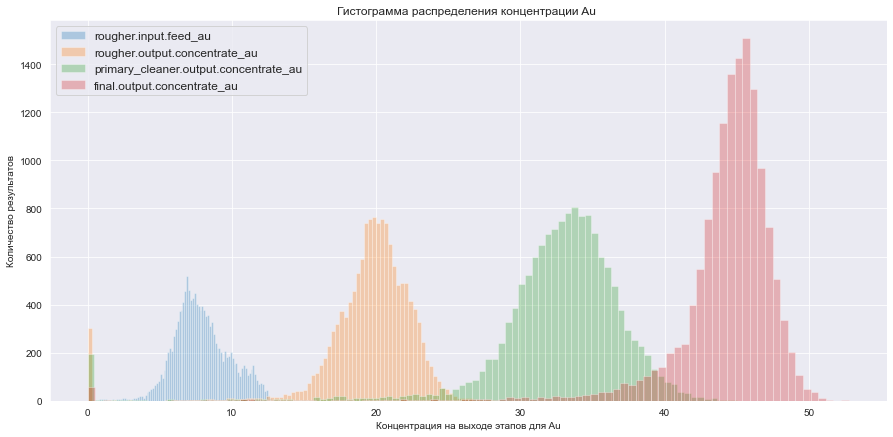

In [26]:
#посмотрим на изменение Au
hist_drawing(data_train, list_au)

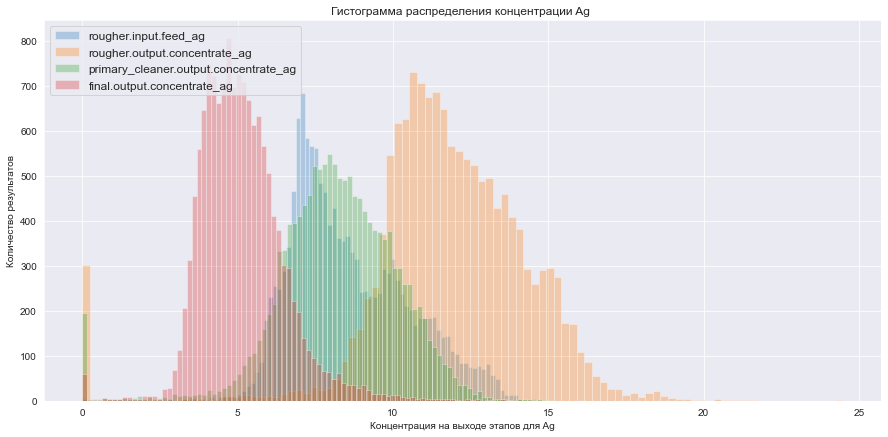

In [27]:
#посмотрим на изменение Ag
hist_drawing(data_train, list_ag)

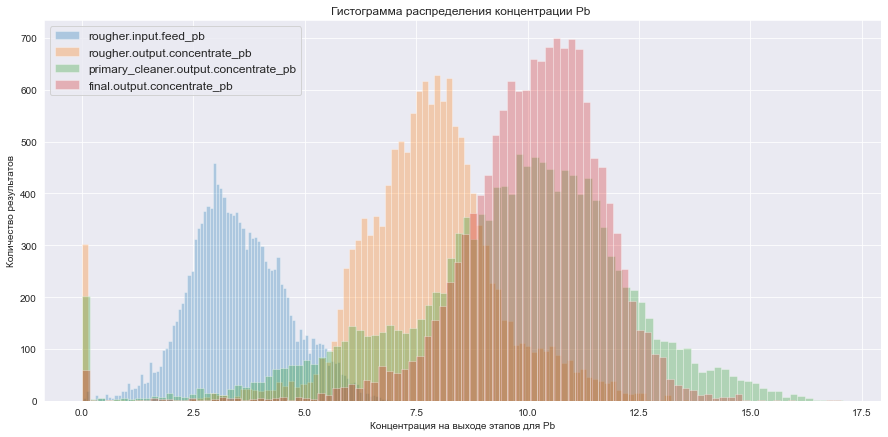

In [28]:
#посмотрим на изменение Pb
hist_drawing(data_train, list_pb)

<b>Вывод:</b> Анализируя графики замечаем, что с каждым этапом увеличивается концентрация золата (Au) и свинца (Pb) и происходит уменьшение концентрации серебра (Ag)

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [29]:
# столбцы с информацией о размерах гранул
# primary_cleaner.input.feed_size флотация -> параметры сырья -> размер гранул
# rougher.input.feed_size  флотация -> параметры сырья -> размер гранул

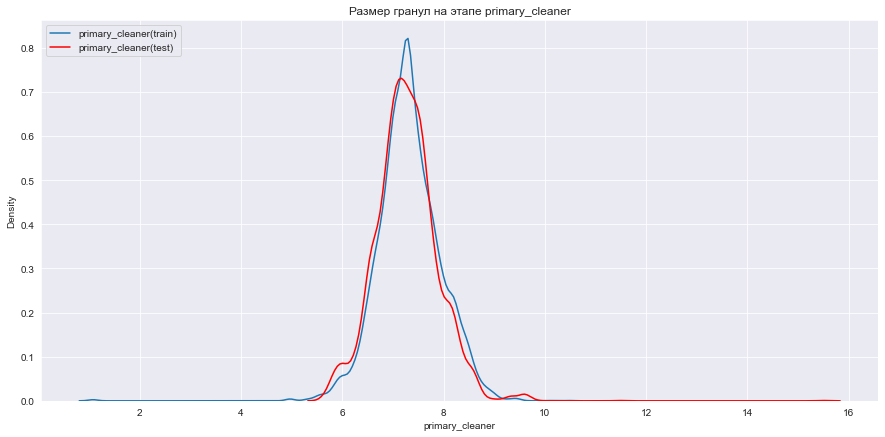

In [30]:
plt.figure(figsize=[15,7])

sns.distplot(data_train['primary_cleaner.input.feed_size'], hist = False, label='primary_cleaner(train)')
sns.distplot(data_test['primary_cleaner.input.feed_size'], hist = False,label='primary_cleaner(test)', color='r')

plt.xlabel('primary_cleaner')
plt.title('Размер гранул на этапе primary_cleaner')
plt.legend(loc='upper left')
plt.show()

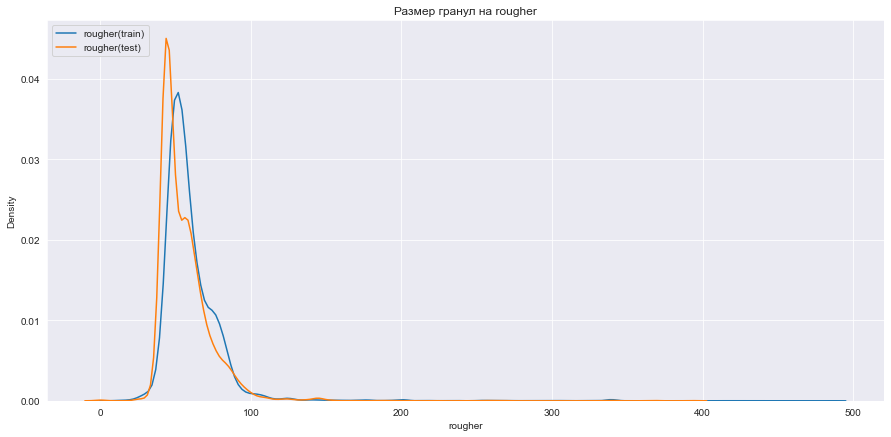

In [31]:
plt.figure(figsize=[15,7])
sns.distplot(data_train['rougher.input.feed_size'], hist = False, label='rougher(train)')
sns.distplot(data_test['rougher.input.feed_size'], hist = False,label='rougher(test)')

plt.xlabel('rougher')
plt.title('Размер гранул на rougher')
plt.legend(loc='upper left')
plt.show()

<b>Вывод по 2.2:</b> Анализируя графики, замечаем, что в целом распределения близки дру к другу, однако они немного различаются. Среднее тренировочной выборки на этапе primary_cleaner близки друг другу, чуть отличаются на этапе rougher. 

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [32]:
#создаем вспомогательный датафрейм с суммарными концентрациями по всем веществам на разных стадиях
data_concentration_total=pd.DataFrame()
#флотация rougher
data_concentration_total['rougher.output'] = data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_sol']+data_train['rougher.output.concentrate_au']                                      
#первичная очистка primary_cleaner
data_concentration_total['primary_cleaner.output']=data_train['primary_cleaner.output.concentrate_ag']+data_train['primary_cleaner.output.concentrate_pb']+data_train['primary_cleaner.output.concentrate_sol']+data_train['primary_cleaner.output.concentrate_au']
#финальный final
data_concentration_total['final.output']=data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_sol']+data_train['final.output.concentrate_au']

#посмотрим что получилось
data_concentration_total.head()

,rougher.output,primary_cleaner.output,final.output
0,66.424950,72.640924,63.644396
1,67.012710,72.543485,63.957723
2,66.103793,72.095042,64.311180
3,65.752751,59.957723,63.573449
4,65.908382,71.321010,64.004667


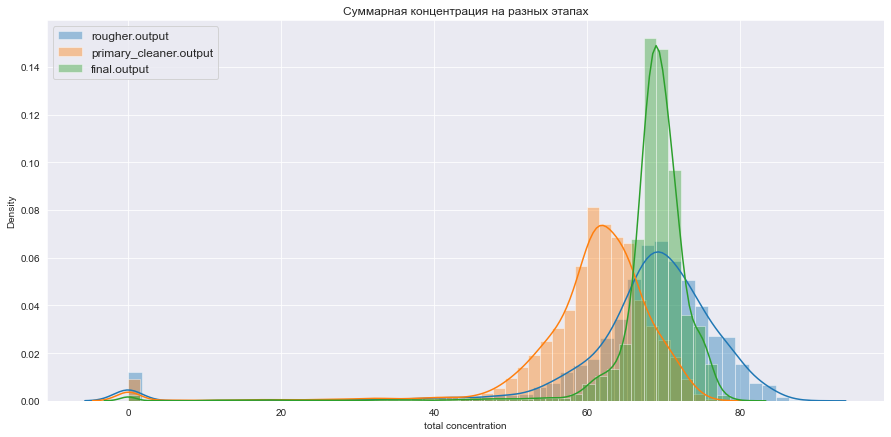

In [33]:
plt.figure(figsize=[15,7])
sns.distplot(data_concentration_total['rougher.output'], label='rougher.output')
sns.distplot(data_concentration_total['primary_cleaner.output'],label='primary_cleaner.output')
sns.distplot(data_concentration_total['final.output'], label='final.output')

plt.xlabel('total concentration')
plt.title('Суммарная концентрация на разных этапах')
plt.legend(loc='upper left', fontsize='large')
plt.show()

Очевидно, что есть значительный 'хвост' из выбросов в районе 0, избавимся от них, они могут повлиять на качество наших моделей.

In [34]:
#создадим функцию, которая уберет все нулевые значения из столбцов
def no_null(df,col):
    df=df[df[col] !=0]
    return df

#сначала продублируем датасет в новый
no_null_data_train=data_train

#применим ее к датасету train 
for item in list_columns_train:
    no_null_data_train=no_null(no_null_data_train,item) 
    

#проверим какой у нас получился датасет по размеру
print(no_null_data_train.shape)

(12831, 87)


In [35]:
def no_null(df,col):
    df=df[df[col] !=0]
    return df

#сначала продублируем датасет в новый
no_null_data_train=data_train

#применим ее к датасету train 
for item in list_columns_train:
    no_null_data_train=no_null(no_null_data_train,item) 
    

#проверим какой у нас получился датасет по размеру
print(no_null_data_train.shape)

(12831, 87)


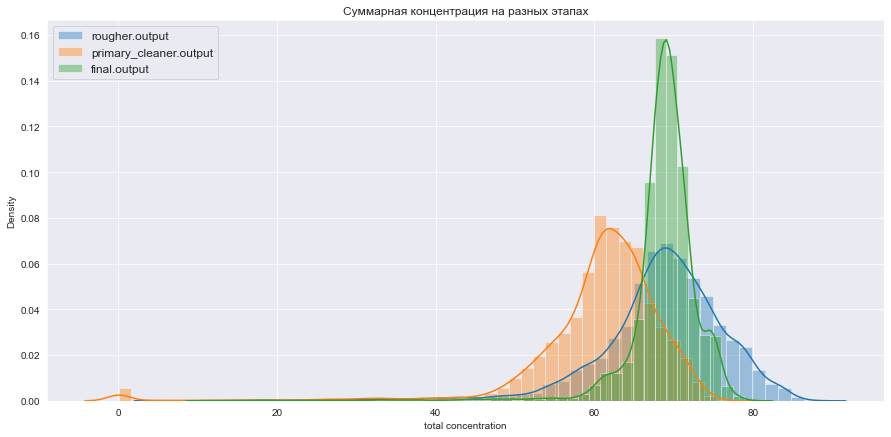

In [36]:
#создаем вспомогательный датафрейм с суммарными концентрациями по всем веществам на разных стадиях без "хвостов"
data_concentration_nonull=pd.DataFrame()

#соберем все данные
data_concentration_nonull['rougher.output'] = no_null_data_train['rougher.output.concentrate_ag']+no_null_data_train['rougher.output.concentrate_pb']+no_null_data_train['rougher.output.concentrate_sol']+no_null_data_train['rougher.output.concentrate_au']                                      
data_concentration_nonull['primary_cleaner.output']=no_null_data_train['primary_cleaner.output.concentrate_ag']+no_null_data_train['primary_cleaner.output.concentrate_pb']+no_null_data_train['primary_cleaner.output.concentrate_sol']+no_null_data_train['primary_cleaner.output.concentrate_au']
data_concentration_nonull['final.output']=no_null_data_train['final.output.concentrate_ag']+no_null_data_train['final.output.concentrate_pb']+no_null_data_train['final.output.concentrate_sol']+no_null_data_train['final.output.concentrate_au']

#визуализируем датасет "без хвостов"
plt.figure(figsize=[15,7])
sns.distplot(data_concentration_nonull['rougher.output'], label='rougher.output')
sns.distplot(data_concentration_nonull['primary_cleaner.output'],label='primary_cleaner.output')
sns.distplot(data_concentration_nonull['final.output'], label='final.output')

plt.xlabel('total concentration')
plt.title('Суммарная концентрация на разных этапах')
plt.legend(loc='upper left', fontsize='large')
plt.show()


<b>Вывод по 2.3.:</b> были удалены выбросы нулевых значений, оценено изменение распределения после удаления. В целом распределение суммарной ценцентрации мало напоминает нормальное из-за длинного "хвоста".

## 3. Постройте модель

#### 3.1.Напишите функцию для вычисления итоговой sMAPE

In [37]:
#sMAPE метрика
def sMAPE(y_true,y_pred):
    sMAPE_score = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return sMAPE_score

In [38]:
#финальная sMAPE метрика
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    final_sMAPE_score=0.25*sMAPE_rougher + 0.75*sMAPE_final
    return final_sMAPE_score

In [39]:
#создадим custom_score на основе sMAPE
custom_score = make_scorer(sMAPE,greater_is_better=False)

#### 3.2. Постройте модель

In [40]:
#выделим целевые признаки
target_final = no_null_data_train['final.output.recovery']
target_rougher = no_null_data_train['rougher.output.recovery']

#признаки для обучения
test_columns=data_test.columns #выберем колонки, которые есть в test
features=no_null_data_train[test_columns] #признаки (по колонкам, которые есть в test!)

features = features.drop(['date'], axis=1) #удалим столбец date

In [41]:
#целевой признак для тестовой выборки
target=data_full[['date','rougher.output.recovery','final.output.recovery']]
data_test_new=data_test
data_test_new=data_test_new.merge(target,on=['date'],how='left')
data_test_new.sort_values(by='date',inplace=True)

#тестовые целевые из data_full
target_test_rougher=data_test_new['rougher.output.recovery']
target_test_final=data_test_new['final.output.recovery']

#проверим соответствие размеров
print(target_test_rougher.shape)
print(target_test_final.shape)
print(data_test.shape)

(5290,)
(5290,)
(5290, 53)


In [42]:
#посмотрим есть ли нулевые значения в этом таргете (берем же из full, когда обрабатывали нули, data_full не трогали)
print(target_test_rougher[target_test_rougher==0].count())
print(target_test_final[target_test_final==0].count())

97
40


In [43]:
#заменим нули на NaN и проверим, что получилось
target_test_rougher[target_test_rougher==0]=np.nan
target_test_final[target_test_final==0]=np.nan
print(target_test_rougher.isna().sum())
print(target_test_final.isna().sum())

97
40


In [44]:
#заменяем NaN на ближайшего соседа
target_test_rougher.fillna(method="ffill",inplace=True)
target_test_final.fillna(method="ffill",inplace=True)

In [45]:
#проверим наличие нулей и пропусков в тестовых таргетах
print(target_test_rougher[target_test_rougher==0].count())
print(target_test_final[target_test_final==0].count())
print(target_test_rougher.isna().sum())
print(target_test_final.isna().sum())

0
0
0
0


In [46]:
#из тестовой выборки удаляем столбец date
data_test=data_test.drop('date',axis=1)
features_test=data_test


Представленная задача это задача регресии. Будем обучать два типа моделей:

   - Линейную регрессию (LinearRegression)
   - Случайный лес для регрессии (RandomForestRegressor)

Выполним поиск лучшей модели для предсказаний

<b>Подбор параметров и обучение</b>

In [47]:
model_rf=RandomForestRegressor()
model_lr=LinearRegression()

In [48]:
#Параметры для GridSearchCV
parametrs_rf = {'n_estimators':[1,51],
                'max_depth':[1,11]}
parametrs_lg = {'fit_intercept':[True,False], 'copy_X':[True, False], 'normalize':[True,False]}

In [49]:
grid_rougher_rf = GridSearchCV(model_rf,param_grid = parametrs_rf,scoring=custom_score, cv=5)
grid_final_rf = GridSearchCV(model_rf,param_grid = parametrs_rf,scoring=custom_score, cv=5)

grid_rougher_lg = GridSearchCV(model_lr,param_grid = parametrs_lg,scoring=custom_score,cv=5)
grid_final_lg = GridSearchCV(model_lr,param_grid = parametrs_lg,scoring=custom_score,cv=5)

In [50]:
#обучаем
    #Случайный лес
grid_rougher_rf.fit(features,target_rougher)
grid_final_rf.fit(features,target_final)
    #Линейная регрессия
grid_rougher_lg.fit(features,target_rougher)
grid_final_lg.fit(features,target_final)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [51]:
#посмотрим какие модели были лучшими
print('Лучшие параметры моделей')
print(grid_rougher_rf.best_estimator_)
print(grid_final_rf.best_estimator_)
print(grid_rougher_lg.best_estimator_)
print(grid_final_lg.best_estimator_)


Лучшие параметры моделей
RandomForestRegressor(max_depth=11, n_estimators=51)
RandomForestRegressor(max_depth=1, n_estimators=51)
LinearRegression()
LinearRegression(fit_intercept=False, normalize=True)


In [52]:
print('Лучшие оценки sMAPE для моделей + метрики sMAPE final')
print()
print('Rougher/Final Random Forest')
print(grid_rougher_rf.best_score_)
print(grid_final_rf.best_score_)
print()
print('final sMAPE на Random Forest')
print(final_sMAPE(grid_rougher_rf.best_score_,grid_final_rf.best_score_))
print()
print('Rougher/Final Linear Regression')
print(grid_rougher_lg.best_score_)
print(grid_final_lg.best_score_)
print()
print('final sMAPE на Linear Regression')
print(final_sMAPE(grid_rougher_lg.best_score_,grid_final_lg.best_score_))

Лучшие оценки sMAPE для моделей + метрики sMAPE final

Rougher/Final Random Forest
-6.74418791011429
-9.518253216390963

final sMAPE на Random Forest
-8.824736889821795

Rougher/Final Linear Regression
-7.519647557666284
-11.04654065257577

final sMAPE на Linear Regression
-10.164817378848397


<b>Проверка на тестовой модели</b>

In [61]:
#обучим лучшую модель с параметрами
best_model_rouger=RandomForestRegressor(max_depth=11, n_estimators=51)
best_model_final=RandomForestRegressor(max_depth=1, n_estimators=51)

best_model_rouger.fit(features,target_rougher)
best_model_final.fit(features,target_final)

#предскажем на тесте
predictions_on_test_rouger = best_model_rouger.predict(features_test)
predictions_on_test_final = best_model_final.predict(features_test)


In [62]:
print('Итоговое значение sMAPE на тестовой модели:')
print()
sMAPE_r=sMAPE(target_test_rougher,predictions_on_test_rouger)
sMAPE_f=sMAPE(target_test_final,predictions_on_test_final)
print(sMAPE_r)
print(sMAPE_f)
print()
print(final_sMAPE(sMAPE_r,sMAPE_f))

Итоговое значение sMAPE на тестовой модели:

4.312973432358394
7.944558679230204

7.0366623675122515


<b>Константная модель</b>

In [63]:
#Константные модели для rouger и final
constant_model_rouger = DummyRegressor(strategy='median')
constant_model_final = DummyRegressor(strategy='median')

In [64]:
#обучим константную модель
constant_model_rouger.fit(features,target_rougher)
constant_model_final.fit(features,target_final)

DummyRegressor(strategy='median')

In [65]:
#предскажем
constant_rouger_pred = constant_model_rouger.predict(features)
constant_final_pred = constant_model_final.predict(features)

In [66]:
#метрики
print('Итоговое sMAPE на константной модели:')
print()
print(final_sMAPE(sMAPE(target_rougher,constant_rouger_pred),sMAPE(target_final,constant_final_pred)))

Итоговое sMAPE на константной модели:

9.359011170353085


Ошибка на тесте по метрике sMAPE приемлимая, меньше чем на константной модели.

### ВЫВОД

1. Подготовка данных
- Были изучены данные по трем датасетам, не обнаружено дубликатов, однако установлено наличие нулевых значений и пропусков.
- Вычислена эффективность обогащения  на обучающей выборке для признака rougher.output.recovery, найдено MAE между расчётами и истинным значением признака, так как оно небольшое, установлено, что эффективность обогащения рассчитана правильно.
- Проанализированы признаки, недоступные в тестовой выборке. Установлено, что из 34 пропущенных столбцов 30 относятся к этапу output, 13 к rougher(флотации), 9 и 8 к этапам final и primary_cleaner.
- Проведена предобработка данных: столбец date заменен на datetime, обработаны пропуски методом ближайшего соседа ffil для fillna.
2. Анализ данных
- Оценена концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Установлено, что концентрация Au и Pb увеличивается от флотации до финальной стадии, а Ag снижается.
- Распределения размеров гранул сырья на обучающей и тестовой выборках схожи, были проанализированы соответствуюе графики, демонстрирующие это. 
- На графиках суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах обнаружены «выбросы»: столбец значений около 0. Выбросы устранены. Распределения далеки от нормального благодаря «хвосту» и смешению вправо.

3. Постройте модель
- Написана функция для вычисления итоговой sMAPE.
   - Линейная регрессия (LinearRegression)
   - Случайный лес для регрессии (RandomForestRegressor)

Подобраны параметры в GridSearch (выбрано для кросс-валидации cv=5). 

Лучшая модель оказалась LinearRegression , на тестовой выборке показала значение <b>sMAPE 7.72</b> (меньше, чем константная 9.359)
